Sea $a\geq 1$ el dígito más bajo de tu DNI y $b$ el más alto.
Define la función $$f(x) = (x^2 - a)^b$$


In [2]:
# Completar aquí
dni = "26649110"

# Convertir la cadena en una lista de enteros
dni_list = [int(digit) for digit in dni]

a = min(digit for digit in dni_list if digit >= 1)
b = max(dni_list)

print(f"a={a}\nb={b}")

def f(x):
    return (x**2-a)**b
# --------------------


a=1
b=9


Dibuja dicha función en el rango que consideres oportuno.
Usaremos dicho gráfico para guiarnos en el cálculo de sus mínimos.
Los resultados que mostraremos a partir de ahora se corresponden con $a = 2$ y $b = 4$.

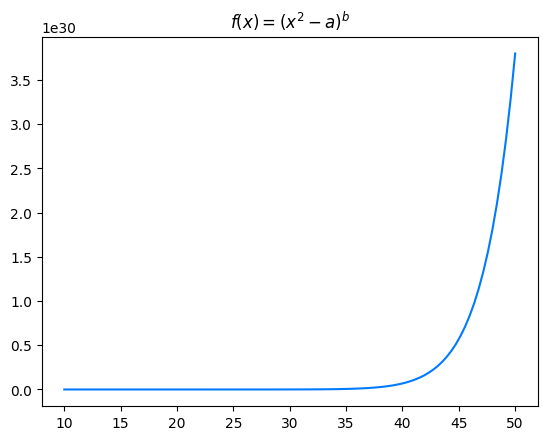

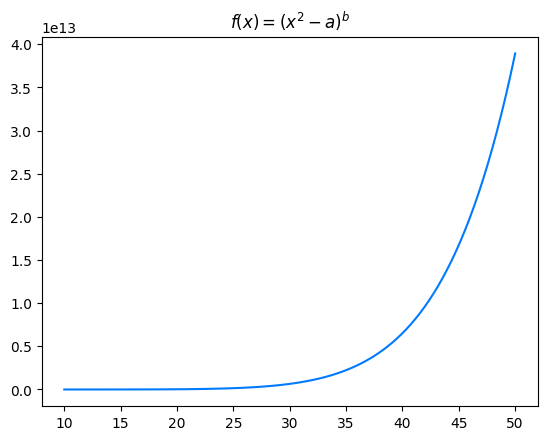

In [3]:
# Completar aquí
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(10, 50, 100)

# Primera figura
plt.plot(x, f(x), color='#007AFF')
plt.title(r"$f(x)=(x^2-a)^b$")
plt.show()

a = 2
b = 4

plt.plot(x, f(x), color='#007AFF')
plt.title(r"$f(x)=(x^2-a)^b$")
plt.show()
# --------------------


Utuliza la función **minimize** del submódulo **optimize** del módulo **scipy** con distintas inicializaciones para calcular los mínimos de la función definida anteriormente. 

In [4]:
# Completar aquí
from scipy.optimize import minimize

for i in range(-3,4):
    x0 = i
    res = minimize(f, x0, method='BFGS', 
                    options={'gtol': 1e-6, 'disp': True})
    print(f"solución x = {res.x}")
# --------------------


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 52
         Gradient evaluations: 26
solución x = [-1.4156768]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 20
         Function evaluations: 42
         Gradient evaluations: 21
solución x = [-1.41273408]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 34
         Gradient evaluations: 17
solución x = [-1.41278317]
Optimization terminated successfully.
         Current function value: 16.000000
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1
solución x = [0.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 34
         Gradient evaluations: 17
solución x = [1.41278315]
Optimization termi

Consideremos ahora la función $$ f_1(x) = -\vert x - a \vert$$

Dibújala en un intervalo adecuado que te ayude a ayude a averiguar si se trata de 
una función coerciva. ¿Crees que se trata d euna función coerciva? ¿Por qué?

In [5]:
# Completar aquí

# --------------------


Añade un término de regularización de la forma $b\vert x\vert$ y dibuja la nueva función regularizada.

In [6]:
# Completar aquí

# --------------------


Resuelve el problema de minimización siguiente usando el método **golden** de **minimize_scalar**:

$$
\text{Minimizar en } x\in\mathbb{R}: \quad f_{\text{reg}}(x) = f_1(x) + b\vert x\vert
$$

In [7]:
# Completar aquí

# --------------------
